In [2]:
import pandas as pd
import numpy as np
import math
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import boxplot
from sklearn.preprocessing import StandardScaler
import scipy as sp
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

In [3]:
train_data = pd.read_csv(r"C:\Users\Anubhav Bhatti\OneDrive\Competition 2 Supervised Learning\C2T1Data\C2T1_Train.csv")
train_data.head()

,encounter_id2,patient_nbr2,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,5283,48330653,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1,8499,63555809,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2,9441,42519137,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,20997,89868902,AfricanAmerican,Female,[40-50),?,1,1,7,9,...,No,Steady,No,No,No,No,No,No,Yes,>30
4,28515,82637321,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [4]:
train_data=train_data.replace({'?':np.nan}).copy()

In [5]:
train_data.head(5)

,encounter_id2,patient_nbr2,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,5283,48330653,Caucasian,Female,[80-90),NaN,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1,8499,63555809,Caucasian,Female,[90-100),NaN,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2,9441,42519137,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,20997,89868902,AfricanAmerican,Female,[40-50),NaN,1,1,7,9,...,No,Steady,No,No,No,No,No,No,Yes,>30
4,28515,82637321,Caucasian,Male,[50-60),NaN,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [6]:
def missing_value(df_table):
  total_missing_values = df_table.isna().sum()
  missing_value_percentage = 100 * total_missing_values/ len(df_table)
  missing_table = pd.concat([total_missing_values, missing_value_percentage], axis=1)
  missing_table_col = missing_table.rename(columns = {0: 'Missing Values', 1: 'Percentage of missing'})
  missing_table_col = missing_table_col[missing_table_col.iloc[:, 1] != 0].sort_values('Percentage of missing', ascending=False).round(2)
  #print(total_missing_Values)
  return missing_table_col

def int_min(param):
    return np.iinfo(param).min

def int_max(param):
    return np.iinfo(param).max

def flo_min(param):
    return np.finfo(param).min

def flo_max(param):
    return np.finfo(param).max

def decrease_mem(in_table, verbose = True):
    data_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    initial_mem_val = in_table.memory_usage().sum() / 2**20 #Calculate memory usage of complete column 
                                                            #and dividng it by 2^20 to convert it into Mb    
    for c in in_table.columns:
        column_type = in_table[c].dtypes
        if column_type in data_types:
            min_val = in_table[c].min()
            max_val = in_table[c].max()
            if str(column_type)[:3] == 'int':
                if min_val > int_min(np.int8) and max_val < int_max(np.int8): #calling another fn int_min & int_max
                    in_table[c] = in_table[c].astype(np.int8)
                elif min_val > int_min(np.int16) and max_val < int_max(np.int16):
                    in_table[c] = in_table[c].astype(np.int16)
                elif min_val > int_min(np.int32) and max_val < int_max(np.int32):
                    in_table[c] = in_table[c].astype(np.int32)
                elif min_val > int_min(np.int64) and max_val < int_max(np.int64):
                    in_table[c] = in_table[c].astype(np.int64)  
            elif min_val > flo_min(np.float16) and max_val < flo_max(np.float16):
                    in_table[c] = in_table[c].astype(np.float16)
            elif min_val > flo_min(np.float32) and max_val < flo_max(np.float32):
                    in_table[c] = in_table[c].astype(np.float32)
            else: in_table[c] = in_table[c].astype(np.float64)
                
    mem_aftr_ops = in_table.memory_usage().sum() / 2**20
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.
          format(mem_aftr_ops, ((initial_mem_val - mem_aftr_ops) / initial_mem_val)* 100))
    return in_table

def remove_outliers(df_table, df_col, Q1, Q3):
  first_quantile = df_col.quantile(Q1)
  third_quantile = df_col.quantile(Q3)
  IQR = third_quantile - first_quantile
  rem_out = df_table[~((df_col < (first_quantile - 1.5*IQR)) | (df_col > (third_quantile + 1.5*IQR)))]
  
  return rem_out

def EDA(df_table):
    summ = pd.DataFrame(df_table.dtypes, columns=['Data Type'])
    summ = summ.reset_index()
    summ['Name'] = summ['index']
    summ = summ[['Name', 'Data Type']]
    summ['Missing Values'] = df_table.isnull().sum().values
    summ['Unique'] = df_table.nunique().values
    summ['First Value'] = df_table.loc[0].values
    summ['Second Value'] = df_table.loc[1].values
    summ['Third Value'] = df_table.loc[2].values
    summ['Minimum Value'] = df_table.min().values
    summ['Maximum Value'] = df_table.max().values
    #summary['Uniques'] = df.nunique().values
    
    for name in summ['Name'].value_counts().index:
        summ.loc[summ['Name'] == name, 'Entropy'] = round(stats.entropy(df_table[name].value_counts(normalize=True), 
                                                                        base=2),2)
        
    return summ

def plot_stack(column_1, column_2):
    plot_stck=pd.crosstab(index=column_1, columns=column_2)
    plot_stck.plot(kind='bar', figsize=(8,8), stacked=True)
    return


In [8]:
missing_value(train_data)

,Missing Values,Percentage of missing
weight,87840,96.78
medical_specialty,43674,48.12
payer_code,38730,42.67
race,2207,2.43
diag_3,1357,1.50
diag_2,336,0.37
diag_1,17,0.02


In [9]:
#droping 'weight' attribute as it has more than 90% of the missing data
train_data_wmis=train_data.drop(columns='weight').copy()
train_data_wmis
del train_data

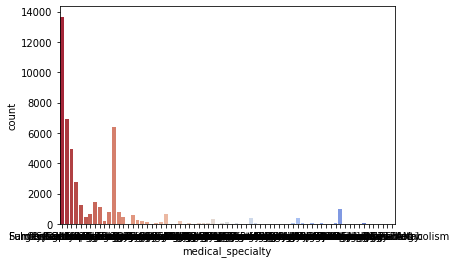

In [10]:
sns.countplot(train_data_wmis['medical_specialty'], palette="coolwarm_r")
plt.show()

In [11]:
train_data_wmis['medical_specialty'].value_counts()[:10]

InternalMedicine              13657
Family/GeneralPractice         6906
Emergency/Trauma               6398
Cardiology                     4939
Surgery-General                2778
Nephrology                     1457
Orthopedics                    1234
Orthopedics-Reconstructive     1137
Radiologist                     966
Pulmonology                     814
Name: medical_specialty, dtype: int64

In [12]:
med_spl = pd.DataFrame(train_data_wmis['medical_specialty'].value_counts())
med_spl = med_spl.reset_index()
med_spl['Name'] = med_spl['index']
med_spl = med_spl[['Name', 'medical_specialty']]
med_spl.rename(columns={'medical_specialty':'Counts', 'Name':'Medical Spl'}, inplace=True)
med_spl

,Medical Spl,Counts
0,InternalMedicine,13657
1,Family/GeneralPractice,6906
2,Emergency/Trauma,6398
3,Cardiology,4939
4,Surgery-General,2778
...,...,...
66,Proctology,1
67,Neurophysiology,1
68,Pediatrics-InfectiousDiseases,1
69,Surgery-PlasticwithinHeadandNeck,1


In [13]:
med_spl[med_spl['Medical Spl'].str.contains('S', na=False)]

,Medical Spl,Counts
4,Surgery-General,2778
12,Surgery-Cardiovascular/Thoracic,623
15,Surgery-Neuro,446
16,Surgery-Vascular,416
25,Surgery-Thoracic,100
27,Surgery-Cardiovascular,85
34,Surgeon,44
36,Surgery-Plastic,34
38,SurgicalSpecialty,32
47,Surgery-Colon&Rectal,11


In [14]:
med_spl[med_spl['Medical Spl'].str.contains('O', na=False)]

,Medical Spl,Counts
6,Orthopedics,1234
7,Orthopedics-Reconstructive,1137
13,ObstetricsandGynecology,619
18,Oncology,314
20,Hematology/Oncology,205
24,Otolaryngology,117
37,Osteopath,33
39,Ophthalmology,31
40,Obsterics&Gynecology-GynecologicOnco,25
45,Obstetrics,14


In [120]:
med_spl[med_spl['Medical Spl'].str.contains('P', na=False)]

,Medical Spl,Counts
1,Family/GeneralPractice,6906
9,Pulmonology,814
10,Psychiatry,774
17,PhysicalMedicineandRehabilitation,383
19,Pediatrics,239
22,Pediatrics-Endocrinology,159
26,Pediatrics-CriticalCare,87
28,Psychology,83
29,Podiatry,80
36,Surgery-Plastic,34


In [16]:
train_data_wmis.isnull().sum()

encounter_id2                   0
patient_nbr2                    0
race                         2207
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  38730
medical_specialty           43674
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         17
diag_2                        336
diag_3                       1357
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

In [17]:
train_data_wmis = train_data_wmis.drop(columns='payer_code').copy()

In [18]:
train_data_wmis.head(10)

,encounter_id2,patient_nbr2,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,5283,48330653,Caucasian,Female,[80-90),2,1,4,13,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1,8499,63555809,Caucasian,Female,[90-100),3,3,4,12,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2,9441,42519137,Caucasian,Male,[40-50),1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,20997,89868902,AfricanAmerican,Female,[40-50),1,1,7,9,NaN,...,No,Steady,No,No,No,No,No,No,Yes,>30
4,28515,82637321,Caucasian,Male,[50-60),2,1,2,3,NaN,...,No,Steady,No,No,No,No,No,No,Yes,>30
5,29661,77391041,AfricanAmerican,Male,[60-70),2,1,4,7,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
6,33687,85504775,Caucasian,Female,[40-50),1,3,7,7,Family/GeneralPractice,...,No,Down,No,No,No,No,No,Ch,Yes,<30
7,35331,77586152,Caucasian,Male,[80-90),1,6,7,10,Family/GeneralPractice,...,No,Steady,No,No,No,No,No,No,Yes,NO
8,48603,84259679,Caucasian,Male,[60-70),3,1,2,4,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,55017,49726661,AfricanAmerican,Female,[60-70),3,1,2,1,NaN,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [19]:
train_data_wmis.medical_specialty.replace({'ObstetricsandGynecology':'Obstetrics & Gynecology', 
                                           'Obsterics&Gynecology-GynecologicOnco':'Obstetrics & Gynecology',
                                          'Hematology/Oncology':'Oncology', 'Obstetrics':'Obstetrics & Gynecology',
                                           'Pediatrics-Hematology-Oncology':'Obstetrics & Gynecology'}, inplace=True)

In [20]:
train_data_wmis = train_data_wmis.dropna(subset=['race', 'diag_3', 'diag_1', 'diag_2']).copy()

In [21]:
train_data_wmis[train_data_wmis.duplicated(subset='patient_nbr2')]

,encounter_id2,patient_nbr2,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
78,1063017,23043110,Caucasian,Female,[50-60),2,1,4,3,NaN,...,No,Steady,No,No,No,No,No,No,Yes,>30
80,1070685,21820676,AfricanAmerican,Male,[50-60),1,6,7,3,NaN,...,No,No,No,No,No,No,No,No,No,NO
143,2302137,41605934,Caucasian,Male,[20-30),2,1,2,2,NaN,...,No,Steady,No,No,No,No,No,No,Yes,>30
175,2545713,86240129,Caucasian,Female,[70-80),1,3,7,11,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,>30
307,3167679,5332361,Other,Female,[60-70),6,25,7,5,InternalMedicine,...,No,Steady,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90757,443834897,181593244,Caucasian,Female,[70-80),1,1,7,5,NaN,...,No,Steady,No,No,No,No,No,No,Yes,NO
90760,443839937,50375498,AfricanAmerican,Female,[60-70),1,1,7,6,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,>30
90762,443840543,74694092,AfricanAmerican,Female,[80-90),1,4,5,5,NaN,...,No,Steady,No,No,No,No,No,No,Yes,NO
90763,443846909,41088659,Caucasian,Male,[70-80),1,1,7,1,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,NO


In [22]:
train_data_wmis.race.value_counts()

Caucasian          66551
AfricanAmerican    16951
Hispanic            1786
Other               1338
Asian                569
Name: race, dtype: int64

In [23]:
train_data_wmis.gender.value_counts()

Female             46955
Male               40239
Unknown/Invalid        1
Name: gender, dtype: int64

In [24]:
train_data_wmis = train_data_wmis[train_data_wmis['gender'] != 'Unknown/Invalid'].copy()

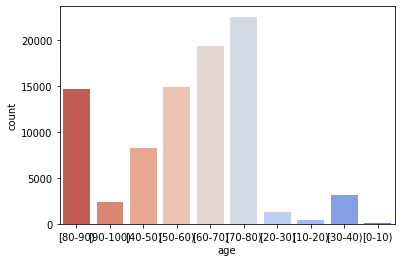

In [25]:
sns.countplot(train_data_wmis['age'], palette="coolwarm_r")
plt.show()

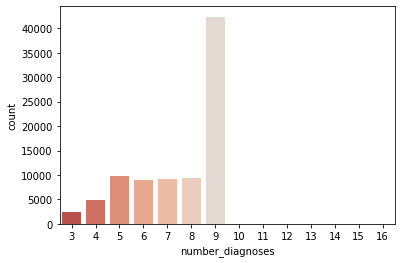

In [27]:
sns.countplot(train_data_wmis['number_diagnoses'], palette="coolwarm_r")
plt.show()

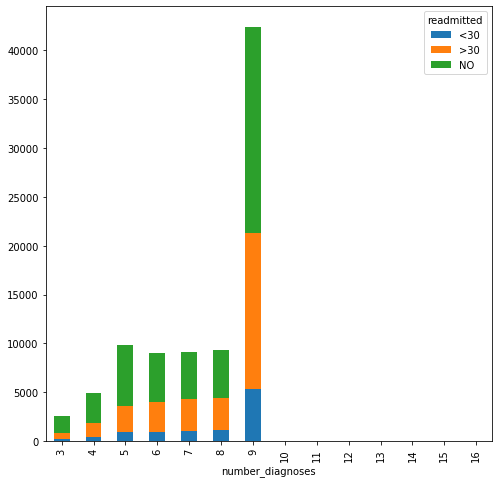

In [28]:
plot_stack(train_data_wmis['number_diagnoses'], train_data_wmis['readmitted'] )

In [29]:
train_data_wmis.groupby(['number_diagnoses', 'readmitted']).size()

number_diagnoses  readmitted
3                 <30             188
                  >30             683
                  NO             1652
4                 <30             409
                  >30            1428
                  NO             3043
5                 <30             917
                  >30            2659
                  NO             6275
6                 <30             952
                  >30            3004
                  NO             5041
7                 <30             989
                  >30            3291
                  NO             4875
8                 <30            1100
                  >30            3342
                  NO             4865
9                 <30            5322
                  >30           15928
                  NO            21124
10                <30               3
                  >30               4
                  NO                9
11                <30               3
                  >30

In [35]:
train_data_wmis.medical_specialty.fillna('zero', inplace=True)

In [37]:
EDA(train_data_wmis)

,Name,Data Type,Missing Values,Unique,First Value,Second Value,Third Value,Minimum Value,Maximum Value,Entropy
0,encounter_id2,int64,0,87194,5283,8499,9441,5283,443859983,16.41
1,patient_nbr2,int64,0,62953,48330653,63555809,42519137,5,189502489,15.71
2,race,object,0,5,Caucasian,Caucasian,Caucasian,AfricanAmerican,Other,1.01
3,gender,object,0,2,Female,Female,Male,Female,Male,1.00
4,age,object,0,10,[80-90),[90-100),[40-50),[0-10),[90-100),2.63
5,admission_type_id,int64,0,8,2,3,1,1,8,1.84
6,discharge_disposition_id,int64,0,26,1,3,1,1,28,2.12
7,admission_source_id,int64,0,17,4,4,7,1,25,1.72
8,time_in_hospital,int64,0,14,13,12,1,1,14,3.33
9,medical_specialty,object,0,68,zero,InternalMedicine,zero,AllergyandImmunology,zero,2.83


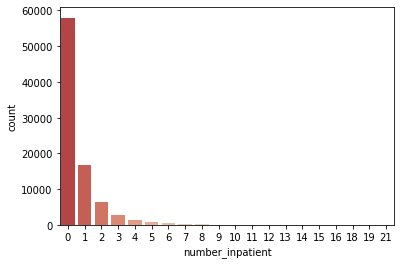

In [38]:
sns.countplot(train_data_wmis['number_inpatient'], palette="coolwarm_r")
plt.show()

In [39]:
train_data_wmis.number_inpatient.value_counts()

0     57888
1     16803
2      6489
3      2892
4      1379
5       693
6       423
7       235
8       129
9        91
10       53
11       44
12       30
13       19
14       10
15        8
16        5
19        1
18        1
21        1
Name: number_inpatient, dtype: int64

In [40]:
col_int = list(train_data_wmis.select_dtypes(include='int64').columns)

In [41]:
col_int

['encounter_id2',
 'patient_nbr2',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [42]:
EDA(train_data_wmis)

,Name,Data Type,Missing Values,Unique,First Value,Second Value,Third Value,Minimum Value,Maximum Value,Entropy
0,encounter_id2,int64,0,87194,5283,8499,9441,5283,443859983,16.41
1,patient_nbr2,int64,0,62953,48330653,63555809,42519137,5,189502489,15.71
2,race,object,0,5,Caucasian,Caucasian,Caucasian,AfricanAmerican,Other,1.01
3,gender,object,0,2,Female,Female,Male,Female,Male,1.00
4,age,object,0,10,[80-90),[90-100),[40-50),[0-10),[90-100),2.63
5,admission_type_id,int64,0,8,2,3,1,1,8,1.84
6,discharge_disposition_id,int64,0,26,1,3,1,1,28,2.12
7,admission_source_id,int64,0,17,4,4,7,1,25,1.72
8,time_in_hospital,int64,0,14,13,12,1,1,14,3.33
9,medical_specialty,object,0,68,zero,InternalMedicine,zero,AllergyandImmunology,zero,2.83


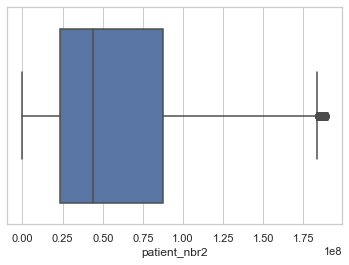

In [43]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=train_data_wmis[col_int[1]])

In [44]:
col_int.pop(0)

'encounter_id2'

In [45]:
col_int.pop(0)

'patient_nbr2'

In [46]:
col_int

['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

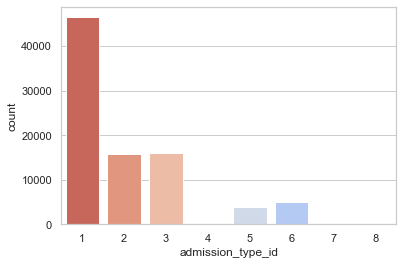

In [47]:
sns.countplot(train_data_wmis[col_int[0]], palette="coolwarm_r")

In [48]:
train_data_wmis[col_int[0]].value_counts()

1    46467
3    15929
2    15727
6     4890
5     3880
8      274
7       17
4       10
Name: admission_type_id, dtype: int64

In [49]:
train_data_wmis

,encounter_id2,patient_nbr2,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,5283,48330653,Caucasian,Female,[80-90),2,1,4,13,zero,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1,8499,63555809,Caucasian,Female,[90-100),3,3,4,12,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2,9441,42519137,Caucasian,Male,[40-50),1,1,7,1,zero,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,20997,89868902,AfricanAmerican,Female,[40-50),1,1,7,9,zero,...,No,Steady,No,No,No,No,No,No,Yes,>30
4,28515,82637321,Caucasian,Male,[50-60),2,1,2,3,zero,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90761,443840309,100162346,AfricanAmerican,Male,[70-80),1,3,7,3,zero,...,No,Down,No,No,No,No,No,Ch,Yes,>30
90762,443840543,74694092,AfricanAmerican,Female,[80-90),1,4,5,5,zero,...,No,Steady,No,No,No,No,No,No,Yes,NO
90763,443846909,41088659,Caucasian,Male,[70-80),1,1,7,1,zero,...,No,Down,No,No,No,No,No,Ch,Yes,NO
90764,443849927,31693541,Caucasian,Female,[80-90),2,3,7,10,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [50]:
train_data_wmis=train_data_wmis[train_data_wmis[col_int[0]] != int(5)].copy()


In [51]:
train_data_wmis=train_data_wmis[train_data_wmis[col_int[0]] != int(6)].copy()

In [52]:
train_data_wmis=train_data_wmis[train_data_wmis[col_int[0]] != int(8)].copy()

In [53]:
train_data_wmis=train_data_wmis.loc[~train_data_wmis.discharge_disposition_id.isin([11,13,19,20,21])].copy()

In [54]:
train_data_wmis[col_int[1]].value_counts()

1     46780
3     10256
6      9713
18     3612
22     1615
2      1545
5       953
4       686
7       461
23      317
14      266
8        93
28       77
15       51
24       39
25       17
9        15
27        3
17        3
12        3
Name: discharge_disposition_id, dtype: int64

In [55]:
train_data_wmis.readmitted.replace({'NO':int(0), '>30':int(2), '<30':int(1)}, inplace=True)
train_data_wmis

,encounter_id2,patient_nbr2,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,5283,48330653,Caucasian,Female,[80-90),2,1,4,13,zero,...,No,Steady,No,No,No,No,No,Ch,Yes,0
1,8499,63555809,Caucasian,Female,[90-100),3,3,4,12,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,0
2,9441,42519137,Caucasian,Male,[40-50),1,1,7,1,zero,...,No,Steady,No,No,No,No,No,Ch,Yes,0
3,20997,89868902,AfricanAmerican,Female,[40-50),1,1,7,9,zero,...,No,Steady,No,No,No,No,No,No,Yes,2
4,28515,82637321,Caucasian,Male,[50-60),2,1,2,3,zero,...,No,Steady,No,No,No,No,No,No,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90761,443840309,100162346,AfricanAmerican,Male,[70-80),1,3,7,3,zero,...,No,Down,No,No,No,No,No,Ch,Yes,2
90762,443840543,74694092,AfricanAmerican,Female,[80-90),1,4,5,5,zero,...,No,Steady,No,No,No,No,No,No,Yes,0
90763,443846909,41088659,Caucasian,Male,[70-80),1,1,7,1,zero,...,No,Down,No,No,No,No,No,Ch,Yes,0
90764,443849927,31693541,Caucasian,Female,[80-90),2,3,7,10,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,0


In [56]:
train_data_wmis.admission_type_id.dtypes

dtype('int64')

In [57]:
decrease_mem(train_data_wmis)

Mem. usage decreased to 21.96 Mb (23.2% reduction)


,encounter_id2,patient_nbr2,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,5283,48330653,Caucasian,Female,[80-90),2,1,4,13,zero,...,No,Steady,No,No,No,No,No,Ch,Yes,0
1,8499,63555809,Caucasian,Female,[90-100),3,3,4,12,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,0
2,9441,42519137,Caucasian,Male,[40-50),1,1,7,1,zero,...,No,Steady,No,No,No,No,No,Ch,Yes,0
3,20997,89868902,AfricanAmerican,Female,[40-50),1,1,7,9,zero,...,No,Steady,No,No,No,No,No,No,Yes,2
4,28515,82637321,Caucasian,Male,[50-60),2,1,2,3,zero,...,No,Steady,No,No,No,No,No,No,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90761,443840309,100162346,AfricanAmerican,Male,[70-80),1,3,7,3,zero,...,No,Down,No,No,No,No,No,Ch,Yes,2
90762,443840543,74694092,AfricanAmerican,Female,[80-90),1,4,5,5,zero,...,No,Steady,No,No,No,No,No,No,Yes,0
90763,443846909,41088659,Caucasian,Male,[70-80),1,1,7,1,zero,...,No,Down,No,No,No,No,No,Ch,Yes,0
90764,443849927,31693541,Caucasian,Female,[80-90),2,3,7,10,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,0


In [58]:
train_data_wmis[col_int[0]].value_counts()

1    45249
3    15788
2    15443
7       15
4       10
Name: admission_type_id, dtype: int64

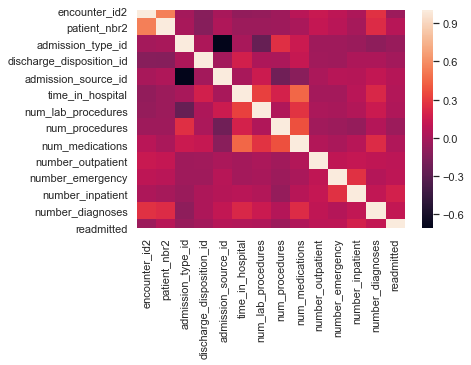

In [61]:
corr = train_data_wmis.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [62]:
corr

,encounter_id2,patient_nbr2,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
encounter_id2,1.000000,0.542060,-0.010389,-0.120923,0.003802,-0.079650,-0.067224,-0.035931,0.070504,0.136175,0.093850,0.026042,0.266357,-0.038917
patient_nbr2,0.542060,1.000000,0.005682,-0.128677,0.028499,-0.041589,-0.043983,-0.035855,0.009154,0.118698,0.070808,0.000462,0.239037,0.065249
admission_type_id,-0.010389,0.005682,1.000000,0.022732,-0.704364,0.003661,-0.256663,0.257425,0.144955,-0.028303,-0.027468,-0.051138,-0.098231,-0.053574
discharge_disposition_id,-0.120923,-0.128677,0.022732,1.000000,-0.016876,0.178395,0.024809,0.017593,0.121997,-0.018970,-0.030503,0.025286,0.025792,-0.015543
admission_source_id,0.003802,0.028499,-0.704364,-0.016876,1.000000,0.001598,0.154133,-0.216628,-0.113317,0.015933,0.063936,0.057048,0.112129,0.057959
time_in_hospital,-0.079650,-0.041589,0.003661,0.178395,0.001598,1.000000,0.324093,0.193067,0.458118,-0.010480,-0.011723,0.068838,0.219420,0.043105
num_lab_procedures,-0.067224,-0.043983,-0.256663,0.024809,0.154133,0.324093,1.000000,0.034702,0.269206,0.014879,0.005610,0.045438,0.147673,0.031242
num_procedures,-0.035931,-0.035855,0.257425,0.017593,-0.216628,0.193067,0.034702,1.000000,0.380097,-0.023906,-0.039135,-0.070508,0.048169,-0.044813
num_medications,0.070504,0.009154,0.144955,0.121997,-0.113317,0.458118,0.269206,0.380097,1.000000,0.042605,0.013012,0.064052,0.240394,0.039408
number_outpatient,0.136175,0.118698,-0.028303,-0.018970,0.015933,-0.010480,0.014879,-0.023906,0.042605,1.000000,0.098743,0.118976,0.095173,0.085260


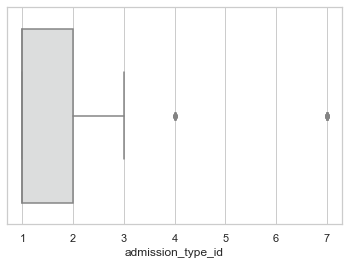

In [63]:
sns.boxplot(train_data_wmis['admission_type_id'], palette='coolwarm_r')

1.1180605583217913


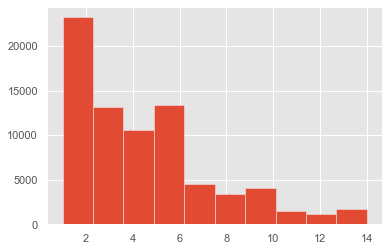

In [64]:
from scipy.stats import skew
import matplotlib.pyplot as plt

plt.style.use('ggplot')

np.var(train_data_wmis['time_in_hospital'])

plt.hist(train_data_wmis['time_in_hospital'])
print(skew(train_data_wmis['time_in_hospital']))

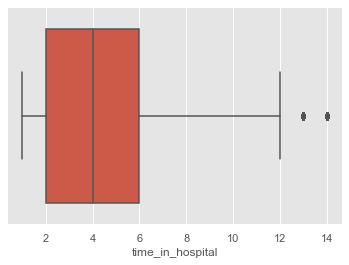

In [65]:
sns.boxplot(train_data_wmis['time_in_hospital'])

In [66]:
train_data_wmis.time_in_hospital.value_counts()

3     13188
2     12910
4     10537
1     10318
5      7598
6      5732
7      4492
8      3377
9      2281
10     1797
11     1442
12     1105
13      918
14      810
Name: time_in_hospital, dtype: int64

In [67]:
train_data_wmis.fillna(0)

,encounter_id2,patient_nbr2,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,5283,48330653,Caucasian,Female,[80-90),2,1,4,13,zero,...,No,Steady,No,No,No,No,No,Ch,Yes,0
1,8499,63555809,Caucasian,Female,[90-100),3,3,4,12,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,0
2,9441,42519137,Caucasian,Male,[40-50),1,1,7,1,zero,...,No,Steady,No,No,No,No,No,Ch,Yes,0
3,20997,89868902,AfricanAmerican,Female,[40-50),1,1,7,9,zero,...,No,Steady,No,No,No,No,No,No,Yes,2
4,28515,82637321,Caucasian,Male,[50-60),2,1,2,3,zero,...,No,Steady,No,No,No,No,No,No,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90761,443840309,100162346,AfricanAmerican,Male,[70-80),1,3,7,3,zero,...,No,Down,No,No,No,No,No,Ch,Yes,2
90762,443840543,74694092,AfricanAmerican,Female,[80-90),1,4,5,5,zero,...,No,Steady,No,No,No,No,No,No,Yes,0
90763,443846909,41088659,Caucasian,Male,[70-80),1,1,7,1,zero,...,No,Down,No,No,No,No,No,Ch,Yes,0
90764,443849927,31693541,Caucasian,Female,[80-90),2,3,7,10,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,0


In [69]:
train_data_wmis.head()

,encounter_id2,patient_nbr2,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,5283,48330653,Caucasian,Female,[80-90),2,1,4,13,zero,...,No,Steady,No,No,No,No,No,Ch,Yes,0
1,8499,63555809,Caucasian,Female,[90-100),3,3,4,12,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,0
2,9441,42519137,Caucasian,Male,[40-50),1,1,7,1,zero,...,No,Steady,No,No,No,No,No,Ch,Yes,0
3,20997,89868902,AfricanAmerican,Female,[40-50),1,1,7,9,zero,...,No,Steady,No,No,No,No,No,No,Yes,2
4,28515,82637321,Caucasian,Male,[50-60),2,1,2,3,zero,...,No,Steady,No,No,No,No,No,No,Yes,2


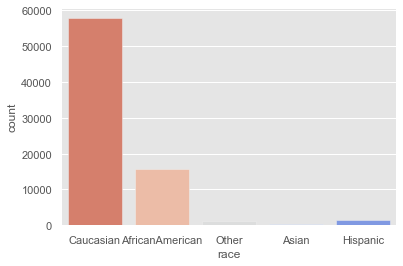

In [70]:
sns.countplot(train_data_wmis['race'], palette='coolwarm_r')

In [71]:
train_data_wmis.discharge_disposition_id.value_counts()

1     46780
3     10256
6      9713
18     3612
22     1615
2      1545
5       953
4       686
7       461
23      317
14      266
8        93
28       77
15       51
24       39
25       17
9        15
27        3
17        3
12        3
Name: discharge_disposition_id, dtype: int64

In [72]:
col_int

['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

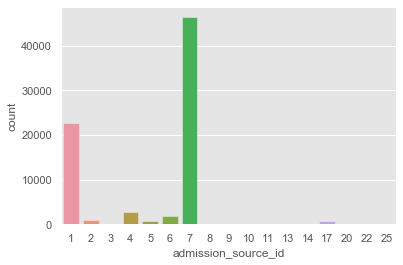

In [73]:
sns.countplot(train_data_wmis[col_int[2]])

In [74]:
train_data_wmis[col_int[2]].value_counts()

7     46401
1     22635
4      2687
6      1854
2       922
17      826
5       768
3       170
20      157
9        49
8        13
22       10
10        6
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64

In [75]:
col_lab = ['race', 'gender', 'age']

In [76]:
lb_make = LabelEncoder()
for index, i in enumerate(col_lab):
    train_data_wmis[col_lab[index]] = lb_make.fit_transform(train_data_wmis[col_lab[index]])
    

In [77]:
train_data_wmis.medical_specialty.replace({0:'zero'}, inplace=True)

#train_data_wmis.readmitted.replace({'NO':int(0), '>30':int(2), '<30':int(1)}, inplace=True)

In [78]:
train_data_wmis

,encounter_id2,patient_nbr2,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,5283,48330653,2,0,8,2,1,4,13,zero,...,No,Steady,No,No,No,No,No,Ch,Yes,0
1,8499,63555809,2,0,9,3,3,4,12,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,0
2,9441,42519137,2,1,4,1,1,7,1,zero,...,No,Steady,No,No,No,No,No,Ch,Yes,0
3,20997,89868902,0,0,4,1,1,7,9,zero,...,No,Steady,No,No,No,No,No,No,Yes,2
4,28515,82637321,2,1,5,2,1,2,3,zero,...,No,Steady,No,No,No,No,No,No,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90761,443840309,100162346,0,1,7,1,3,7,3,zero,...,No,Down,No,No,No,No,No,Ch,Yes,2
90762,443840543,74694092,0,0,8,1,4,5,5,zero,...,No,Steady,No,No,No,No,No,No,Yes,0
90763,443846909,41088659,2,1,7,1,1,7,1,zero,...,No,Down,No,No,No,No,No,Ch,Yes,0
90764,443849927,31693541,2,0,8,2,3,7,10,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,0


In [79]:
train_data_wmis.num_lab_procedures.value_counts()

1      2697
43     2232
44     1960
45     1889
38     1737
       ... 
132       1
118       1
103       1
126       1
121       1
Name: num_lab_procedures, Length: 113, dtype: int64

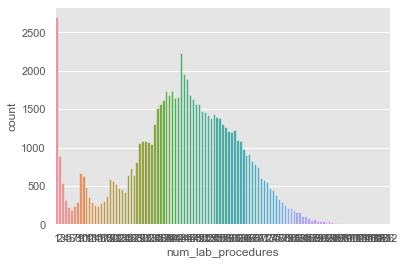

In [80]:
sns.countplot(train_data_wmis['num_lab_procedures'])

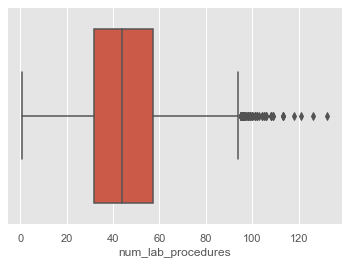

In [81]:
sns.boxplot(train_data_wmis['num_lab_procedures'])

In [351]:
Q1 = train_data_wmis.num_lab_procedures.quantile(0.25)
Q3 = train_data_wmis.num_lab_procedures.quantile(0.90)

IQR = Q3 - Q1
print(IQR)
print(Q1)
print(Q3)

35.0
32.0
67.0


In [352]:
train_data_wmis=train_data_wmis[~((train_data_wmis['num_lab_procedures'] < (Q1 - 1.5*IQR)) | (train_data_wmis['num_lab_procedures'] > (Q3 + 1.5*IQR)))].copy()

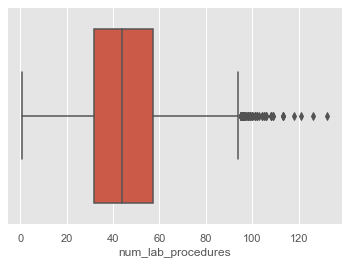

In [82]:
sns.boxplot(train_data_wmis['num_lab_procedures'])

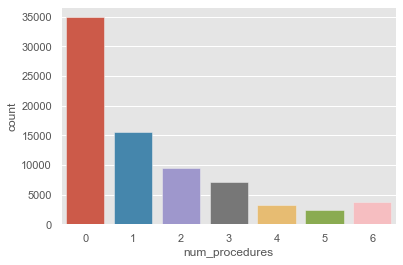

In [83]:
sns.countplot(train_data_wmis['num_procedures'])


In [84]:
train_data_wmis.diag_1.value_counts()

414    5319
428    5275
786    3071
410    2751
486    2579
       ... 
10        1
633       1
832       1
842       1
838       1
Name: diag_1, Length: 689, dtype: int64

In [85]:
#convert values starting with 'V' and 'E' to a numeric value so that Binning can be used on the whole column in diag_1
train_data_wmis.loc[train_data_wmis['diag_1'].str.contains('V',na=False), 'diag_1'] = 1000
train_data_wmis.loc[train_data_wmis['diag_1'].str.contains('E',na=False), 'diag_1'] = 1300

In [86]:
#convert values starting with 'V' and 'E' to a numeric value so that Binning can be used on the whole column in diag_2
train_data_wmis.loc[train_data_wmis['diag_2'].str.contains('V',na=False), 'diag_2'] = 1000
train_data_wmis.loc[train_data_wmis['diag_2'].str.contains('E',na=False), 'diag_2'] = 1300

In [87]:
#applying binning to diag_1 by taking its float value into bin_diag and then binning in values of bin_diag in bin_diag_1
#binning intervals are selected from ICD-9-CM codes
bins = [1, 140, 240, 280, 290, 320, 390, 460, 520, 580, 630, 680, 710, 740, 760, 780, 800, 1000, 1200, 1400]
train_data_wmis['bin_diag'] = train_data_wmis.diag_1.astype('float')
train_data_wmis['bin_diag2'] = train_data_wmis.diag_2.astype('float')
train_data_wmis['bin_diag_1'] = pd.cut(train_data_wmis['bin_diag'], bins=bins, right=False)
train_data_wmis['bin_diag_2'] = pd.cut(train_data_wmis['bin_diag2'], bins=bins, right=False)

In [88]:
train_data_wmis

,encounter_id2,patient_nbr2,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,bin_diag,bin_diag2,bin_diag_1,bin_diag_2
0,5283,48330653,2,0,8,2,1,4,13,zero,...,No,No,No,Ch,Yes,0,398.00,427.0,"[390, 460)","[390, 460)"
1,8499,63555809,2,0,9,3,3,4,12,InternalMedicine,...,No,No,No,Ch,Yes,0,434.00,198.0,"[390, 460)","[140, 240)"
2,9441,42519137,2,1,4,1,1,7,1,zero,...,No,No,No,Ch,Yes,0,197.00,157.0,"[140, 240)","[140, 240)"
3,20997,89868902,0,0,4,1,1,7,9,zero,...,No,No,No,No,Yes,2,250.70,403.0,"[240, 280)","[390, 460)"
4,28515,82637321,2,1,5,2,1,2,3,zero,...,No,No,No,No,Yes,2,414.00,411.0,"[390, 460)","[390, 460)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90761,443840309,100162346,0,1,7,1,3,7,3,zero,...,No,No,No,Ch,Yes,2,250.13,291.0,"[240, 280)","[290, 320)"
90762,443840543,74694092,0,0,8,1,4,5,5,zero,...,No,No,No,No,Yes,0,560.00,276.0,"[520, 580)","[240, 280)"
90763,443846909,41088659,2,1,7,1,1,7,1,zero,...,No,No,No,Ch,Yes,0,38.00,590.0,"[1, 140)","[580, 630)"
90764,443849927,31693541,2,0,8,2,3,7,10,Surgery-General,...,No,No,No,Ch,Yes,0,996.00,285.0,"[800, 1000)","[280, 290)"


In [89]:
train_data_wmis.drop(columns=['bin_diag', 'bin_diag2'], inplace=True)

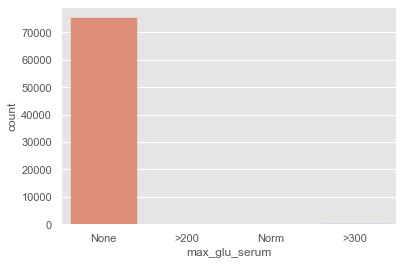

In [90]:
sns.countplot(train_data_wmis['max_glu_serum'], palette='coolwarm_r')

In [91]:
train_data_wmis.max_glu_serum.value_counts()

None    75539
Norm      492
>300      295
>200      179
Name: max_glu_serum, dtype: int64

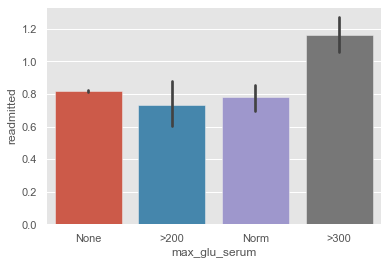

In [92]:
sns.barplot(x=train_data_wmis['max_glu_serum'], y=train_data_wmis['readmitted'])

In [94]:
len(train_data_wmis[((train_data_wmis['max_glu_serum'].str.contains('>300')) & (train_data_wmis['readmitted'] == int(0)))])


# len(train_data_wmis[train_data_wmis['readmitted'] == int(0)])

102

In [95]:
grouped = train_data_wmis.groupby(['max_glu_serum','readmitted'])
grouped.size()

max_glu_serum  readmitted
>200           0               102
               1                23
               2                54
>300           0               102
               1                43
               2               150
None           0             40308
               1              8764
               2             26467
Norm           0               276
               1                49
               2               167
dtype: int64

In [96]:
max_glu_readm = pd.crosstab(index=train_data_wmis["max_glu_serum"], 
                          columns=train_data_wmis["readmitted"])

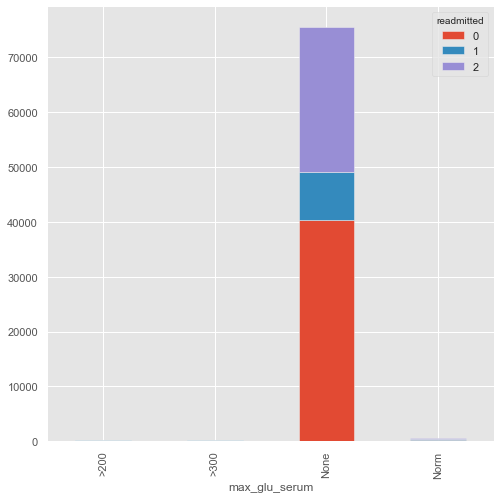

In [97]:
max_glu_readm.plot(kind='bar', figsize=(8,8), stacked=True)

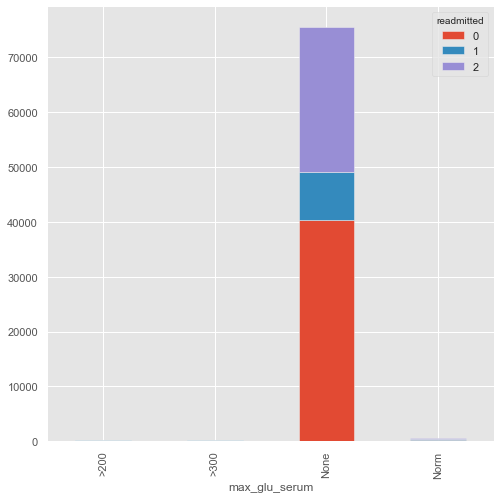

In [98]:
plot_stack(train_data_wmis['max_glu_serum'], train_data_wmis['readmitted'])

In [99]:
train_data_wmis.drop(columns=['metformin-rosiglitazone', 'citoglipton', 'examide'], inplace=True)

In [100]:
EDA(train_data_wmis)

,Name,Data Type,Missing Values,Unique,First Value,Second Value,Third Value,Minimum Value,Maximum Value,Entropy
0,encounter_id2,int32,0,76505,5283,8499,9441,5283,443859983,16.22
1,patient_nbr2,int32,0,55400,48330653,63555809,42519137,5,189502489,15.53
2,race,int32,0,5,2,2,2,0,4,1.02
3,gender,int32,0,2,0,0,1,0,1,1.00
4,age,int32,0,10,8,9,4,0,9,2.64
5,admission_type_id,int8,0,5,2,3,1,1,7,1.39
6,discharge_disposition_id,int8,0,20,1,3,1,1,28,1.93
7,admission_source_id,int8,0,17,4,4,7,1,25,1.52
8,time_in_hospital,int8,0,14,13,12,1,1,14,3.32
9,medical_specialty,object,0,66,zero,InternalMedicine,zero,AllergyandImmunology,zero,2.80


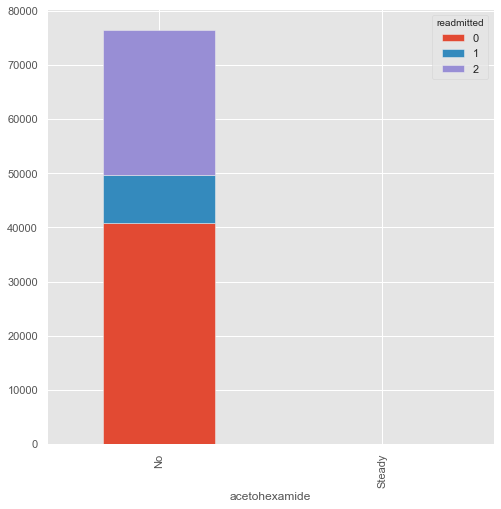

In [101]:
plot_stack(train_data_wmis['acetohexamide'], train_data_wmis['readmitted'])

In [102]:
grouped = train_data_wmis.groupby(['acetohexamide','readmitted'])
grouped.size()

acetohexamide  readmitted
No             0             40788
               1              8879
               2             26837
Steady         2                 1
dtype: int64

In [103]:
train_data_wmis.drop(columns=['acetohexamide'], inplace=True)

In [104]:
grouped = train_data_wmis.groupby(['tolbutamide','readmitted'])
grouped.size()

tolbutamide  readmitted
No           0             40779
             1              8878
             2             26834
Steady       0                 9
             1                 1
             2                 4
dtype: int64

In [105]:
train_data_wmis.drop(columns=['tolbutamide'], inplace=True)

In [106]:
grouped = train_data_wmis.groupby(['troglitazone','readmitted'])
grouped.size()

troglitazone  readmitted
No            0             40787
              1              8879
              2             26837
Steady        0                 1
              2                 1
dtype: int64

In [107]:
train_data_wmis.drop(columns=['troglitazone'], inplace=True)

In [108]:
def group(col_1, col_2, data):
    grouped = data.groupby([col_1,col_2])
    return grouped.size()

In [109]:
group('glipizide-metformin', 'readmitted', train_data_wmis)

glipizide-metformin  readmitted
No                   0             40784
                     1              8879
                     2             26834
Steady               0                 4
                     2                 4
dtype: int64

In [110]:
train_data_wmis.drop(columns=['glipizide-metformin'], inplace=True)

In [111]:
train_data_wmis.drop(columns=['glimepiride-pioglitazone', 'metformin-pioglitazone'], inplace=True)

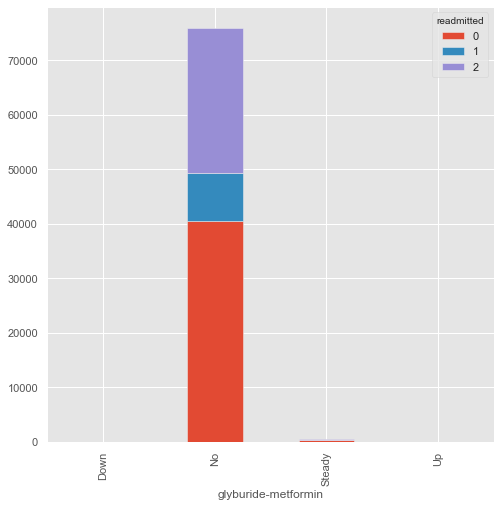

In [112]:
plot_stack(train_data_wmis['glyburide-metformin'], train_data_wmis['readmitted'])

In [113]:
group('glyburide-metformin', 'readmitted', train_data_wmis)

glyburide-metformin  readmitted
Down                 0                 3
No                   0             40512
                     1              8822
                     2             26651
Steady               0               269
                     1                57
                     2               186
Up                   0                 4
                     2                 1
dtype: int64

In [114]:
train_data_wmis.drop(columns=['glyburide-metformin'], inplace=True)

In [115]:
train_data_wmis.drop(columns=['chlorpropamide', 'acarbose', 'miglitol', 'tolazamide', 'nateglinide'], inplace=True)

In [116]:
EDA(train_data_wmis)

,Name,Data Type,Missing Values,Unique,First Value,Second Value,Third Value,Minimum Value,Maximum Value,Entropy
0,encounter_id2,int32,0,76505,5283,8499,9441,5283,443859983,16.22
1,patient_nbr2,int32,0,55400,48330653,63555809,42519137,5,189502489,15.53
2,race,int32,0,5,2,2,2,0,4,1.02
3,gender,int32,0,2,0,0,1,0,1,1.00
4,age,int32,0,10,8,9,4,0,9,2.64
5,admission_type_id,int8,0,5,2,3,1,1,7,1.39
6,discharge_disposition_id,int8,0,20,1,3,1,1,28,1.93
7,admission_source_id,int8,0,17,4,4,7,1,25,1.52
8,time_in_hospital,int8,0,14,13,12,1,1,14,3.32
9,medical_specialty,object,0,66,zero,InternalMedicine,zero,AllergyandImmunology,zero,2.80


In [117]:
group('repaglinide', 'readmitted', train_data_wmis)

repaglinide  readmitted
Down         0                21
             1                 2
             2                15
No           0             40220
             1              8704
             2             26330
Steady       0               506
             1               157
             2               466
Up           0                41
             1                16
             2                27
dtype: int64

In [118]:
train_data_wmis.drop(columns=['diag_1', 'diag_2'], inplace=True)

In [119]:
train_data_wmis['medical_specialty'] = lb_make.fit_transform(train_data_wmis['medical_specialty'])
train_data_wmis['A1Cresult'] = lb_make.fit_transform(train_data_wmis['A1Cresult'])
train_data_wmis['metformin'] = lb_make.fit_transform(train_data_wmis['metformin'])
train_data_wmis['repaglinide'] = lb_make.fit_transform(train_data_wmis['repaglinide'])
train_data_wmis['glimepiride'] = lb_make.fit_transform(train_data_wmis['glimepiride'])
train_data_wmis['glipizide'] = lb_make.fit_transform(train_data_wmis['glipizide'])
train_data_wmis['glyburide'] = lb_make.fit_transform(train_data_wmis['glyburide'])
train_data_wmis['pioglitazone'] = lb_make.fit_transform(train_data_wmis['pioglitazone'])
train_data_wmis['rosiglitazone'] = lb_make.fit_transform(train_data_wmis['rosiglitazone'])
train_data_wmis['insulin'] = lb_make.fit_transform(train_data_wmis['insulin'])
train_data_wmis['change'] = lb_make.fit_transform(train_data_wmis['change'])
train_data_wmis['diabetesMed'] = lb_make.fit_transform(train_data_wmis['diabetesMed'])
train_data_wmis['bin_diag_1'] = lb_make.fit_transform(train_data_wmis['bin_diag_1'])
train_data_wmis['bin_diag_2'] = lb_make.fit_transform(train_data_wmis['bin_diag_2'])


In [155]:
EDA(train_data_wmis)

,Name,Data Type,Missing Values,Unique,First Value,Second Value,Third Value,Minimum Value,Maximum Value,Entropy
0,encounter_id2,int32,0,76505,5283,8499,9441,5283,443859983,16.22
1,patient_nbr2,int32,0,55400,48330653,63555809,42519137,5,189502489,15.53
2,race,int32,0,5,2,2,2,0,4,1.02
3,gender,int32,0,2,0,0,1,0,1,1.00
4,age,int32,0,10,8,9,4,0,9,2.64
5,admission_type_id,int8,0,5,2,3,1,1,7,1.39
6,discharge_disposition_id,int8,0,20,1,3,1,1,28,1.93
7,admission_source_id,int8,0,17,4,4,7,1,25,1.52
8,time_in_hospital,int8,0,14,13,12,1,1,14,3.32
9,medical_specialty,int32,0,66,65,17,65,0,65,2.80


In [121]:
train_data_wmis['readmit_binary'] = train_data_wmis['readmitted']

In [122]:
train_data_wmis.readmit_binary.replace({int(2):int(1)}, inplace=True)

In [156]:
col_list =list(train_data_wmis.columns)

In [157]:
col_list

['encounter_id2',
 'patient_nbr2',
 'race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted',
 'bin_diag_1',
 'bin_diag_2',
 'readmit_binary']

In [160]:
col_list.remove('encounter_id2')

In [161]:
col_list.remove('patient_nbr2')

In [162]:
col_list.remove('diag_3')
col_list.remove('max_glu_serum')
col_list.remove('readmit_binary')

In [163]:
train = train_data_wmis[col_list].copy()
train

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,bin_diag_1,bin_diag_2
0,2,0,8,2,1,4,13,65,68,2,...,2,1,1,1,2,0,1,0,6,6
1,2,0,9,3,3,4,12,17,33,3,...,1,1,1,2,2,0,1,0,6,1
2,2,1,4,1,1,7,1,65,51,0,...,2,1,1,1,2,0,1,0,1,1
3,0,0,4,1,1,7,9,65,47,2,...,1,1,1,1,2,1,1,2,2,6
4,2,1,5,2,1,2,3,65,31,6,...,1,1,1,1,2,1,1,2,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90761,0,1,7,1,3,7,3,65,51,0,...,1,1,1,1,0,0,1,2,2,4
90762,0,0,8,1,4,5,5,65,33,3,...,1,1,1,1,2,1,1,0,8,2
90763,2,1,7,1,1,7,1,65,53,0,...,1,1,1,1,0,0,1,0,0,9
90764,2,0,8,2,3,7,10,56,45,2,...,2,1,2,1,3,0,1,0,15,3


In [164]:
EDA(train)

,Name,Data Type,Missing Values,Unique,First Value,Second Value,Third Value,Minimum Value,Maximum Value,Entropy
0,race,int32,0,5,2,2,2,0,4,1.02
1,gender,int32,0,2,0,0,1,0,1,1.00
2,age,int32,0,10,8,9,4,0,9,2.64
3,admission_type_id,int8,0,5,2,3,1,1,7,1.39
4,discharge_disposition_id,int8,0,20,1,3,1,1,28,1.93
5,admission_source_id,int8,0,17,4,4,7,1,25,1.52
6,time_in_hospital,int8,0,14,13,12,1,1,14,3.32
7,medical_specialty,int32,0,66,65,17,65,0,65,2.80
8,num_lab_procedures,int16,0,113,68,33,51,1,132,6.14
9,num_procedures,int8,0,7,2,3,0,0,6,2.24


In [165]:
col_list

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted',
 'bin_diag_1',
 'bin_diag_2']

In [166]:
col_binary = col_list.copy()

In [167]:
col_binary

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted',
 'bin_diag_1',
 'bin_diag_2']

In [168]:
col_binary.append('readmit_binary')

In [169]:
train_binary = train_data_wmis[col_binary].copy()

In [170]:
train_binary.drop(columns=['readmitted'], inplace=True)

In [171]:
EDA(train_binary)

,Name,Data Type,Missing Values,Unique,First Value,Second Value,Third Value,Minimum Value,Maximum Value,Entropy
0,race,int32,0,5,2,2,2,0,4,1.02
1,gender,int32,0,2,0,0,1,0,1,1.00
2,age,int32,0,10,8,9,4,0,9,2.64
3,admission_type_id,int8,0,5,2,3,1,1,7,1.39
4,discharge_disposition_id,int8,0,20,1,3,1,1,28,1.93
5,admission_source_id,int8,0,17,4,4,7,1,25,1.52
6,time_in_hospital,int8,0,14,13,12,1,1,14,3.32
7,medical_specialty,int32,0,66,65,17,65,0,65,2.80
8,num_lab_procedures,int16,0,113,68,33,51,1,132,6.14
9,num_procedures,int8,0,7,2,3,0,0,6,2.24


In [172]:
col_binary.remove('readmit_binary')

In [173]:
col_binary.remove('readmitted')

In [174]:
train_binary

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,bin_diag_1,bin_diag_2,readmit_binary
0,2,0,8,2,1,4,13,65,68,2,...,2,1,1,1,2,0,1,6,6,0
1,2,0,9,3,3,4,12,17,33,3,...,1,1,1,2,2,0,1,6,1,0
2,2,1,4,1,1,7,1,65,51,0,...,2,1,1,1,2,0,1,1,1,0
3,0,0,4,1,1,7,9,65,47,2,...,1,1,1,1,2,1,1,2,6,1
4,2,1,5,2,1,2,3,65,31,6,...,1,1,1,1,2,1,1,6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90761,0,1,7,1,3,7,3,65,51,0,...,1,1,1,1,0,0,1,2,4,1
90762,0,0,8,1,4,5,5,65,33,3,...,1,1,1,1,2,1,1,8,2,0
90763,2,1,7,1,1,7,1,65,53,0,...,1,1,1,1,0,0,1,0,9,0
90764,2,0,8,2,3,7,10,56,45,2,...,2,1,2,1,3,0,1,15,3,0


In [175]:
labels_binary = np.array(train_binary['readmit_binary'])
labels_binary

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [176]:
train_binary.drop(columns=['readmit_binary'], inplace=True)

In [177]:
tr_fe_bin, te_fe_bin, tr_la_bin, te_la_bin = train_test_split(train_binary, labels_binary, test_size = 0.3,
                                                                                    random_state = 42)

In [178]:
rand_clas = RandomForestClassifier(n_jobs=2, random_state=42, n_estimators=1200, bootstrap = True, verbose=True)
rand_clas.fit(tr_fe_bin, tr_la_bin)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    8.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   18.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:   33.1s
[Parallel(n_jobs=2)]: Done 1200 out of 1200 | elapsed:   49.5s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=2, oob_score=False, random_state=42, verbose=True,
                       warm_start=False)

In [179]:
pred_1 = rand_clas.predict(te_fe_bin)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    2.7s
[Parallel(n_jobs=2)]: Done 1200 out of 1200 | elapsed:    4.3s finished


In [180]:
pred_1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [181]:
pd.crosstab(te_la_bin, pred_1, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,8789,3448
1,5066,5649


In [182]:
print('val auc:', roc_auc_score(te_la_bin, pred_1))

val auc: 0.6227182228602156


In [185]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [186]:
rfc_cv_score = cross_val_score(rand_clas, train_binary, labels_binary, cv=10, scoring='roc_auc')

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   13.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   29.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:   50.9s
[Parallel(n_jobs=2)]: Done 1200 out of 1200 | elapsed:  1.3min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 1200 out of 1200 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    5.3s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   23.8s
[Parallel(n_jobs

In [187]:
print("=== Confusion Matrix ===")
print(confusion_matrix(te_la_bin, pred_1))
print('\n')
print("=== Classification Report ===")
print(classification_report(te_la_bin, pred_1))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[8789 3448]
 [5066 5649]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.63      0.72      0.67     12237
           1       0.62      0.53      0.57     10715

    accuracy                           0.63     22952
   macro avg       0.63      0.62      0.62     22952
weighted avg       0.63      0.63      0.63     22952



=== All AUC Scores ===
[0.66290617 0.67581204 0.62921844 0.67052244 0.62615108 0.64756924
 0.66858139 0.69519715 0.67010706 0.6908006 ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6636865608925372


In [188]:
rand_clas_1 = RandomForestClassifier(verbose=True)

In [193]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rand_clas_1, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = 1)
# Fit the model
rfc_random.fit(tr_fe_bin, tr_la_bin)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=1000, max_features=auto, max_depth=140 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   48.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   53.3s remaining:    0.0s


[CV]  n_estimators=1000, max_features=auto, max_depth=140, total=  53.4s
[CV] n_estimators=1000, max_features=auto, max_depth=140 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   47.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.6s finished


[CV]  n_estimators=1000, max_features=auto, max_depth=140, total=  52.3s
[CV] n_estimators=1000, max_features=auto, max_depth=140 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   47.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.6s finished


[CV]  n_estimators=1000, max_features=auto, max_depth=140, total=  52.4s
[CV] n_estimators=1400, max_features=auto, max_depth=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    6.6s finished


[CV]  n_estimators=1400, max_features=auto, max_depth=100, total= 1.2min
[CV] n_estimators=1400, max_features=auto, max_depth=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    6.8s finished


[CV]  n_estimators=1400, max_features=auto, max_depth=100, total= 1.2min
[CV] n_estimators=1400, max_features=auto, max_depth=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    6.5s finished


[CV]  n_estimators=1400, max_features=auto, max_depth=100, total= 1.2min
[CV] n_estimators=800, max_features=sqrt, max_depth=260 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   37.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.7s finished


[CV]  n_estimators=800, max_features=sqrt, max_depth=260, total=  42.0s
[CV] n_estimators=800, max_features=sqrt, max_depth=260 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   38.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.7s finished


[CV]  n_estimators=800, max_features=sqrt, max_depth=260, total=  42.6s
[CV] n_estimators=800, max_features=sqrt, max_depth=260 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   38.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.7s finished


[CV]  n_estimators=800, max_features=sqrt, max_depth=260, total=  42.2s
[CV] n_estimators=2000, max_features=auto, max_depth=300 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    9.4s finished


[CV]  n_estimators=2000, max_features=auto, max_depth=300, total= 1.8min
[CV] n_estimators=2000, max_features=auto, max_depth=300 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    9.5s finished


[CV]  n_estimators=2000, max_features=auto, max_depth=300, total= 1.8min
[CV] n_estimators=2000, max_features=auto, max_depth=300 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    9.5s finished


[CV]  n_estimators=2000, max_features=auto, max_depth=300, total= 1.8min
[CV] n_estimators=1000, max_features=auto, max_depth=300 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   47.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.7s finished


[CV]  n_estimators=1000, max_features=auto, max_depth=300, total=  52.3s
[CV] n_estimators=1000, max_features=auto, max_depth=300 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   47.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.6s finished


[CV]  n_estimators=1000, max_features=auto, max_depth=300, total=  52.4s
[CV] n_estimators=1000, max_features=auto, max_depth=300 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   47.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.7s finished


[CV]  n_estimators=1000, max_features=auto, max_depth=300, total=  52.4s
[CV] n_estimators=600, max_features=sqrt, max_depth=420 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   28.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    2.7s finished


[CV]  n_estimators=600, max_features=sqrt, max_depth=420, total=  31.5s
[CV] n_estimators=600, max_features=sqrt, max_depth=420 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   28.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    2.7s finished


[CV]  n_estimators=600, max_features=sqrt, max_depth=420, total=  31.2s
[CV] n_estimators=600, max_features=sqrt, max_depth=420 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   30.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    2.8s finished


[CV]  n_estimators=600, max_features=sqrt, max_depth=420, total=  33.9s
[CV] n_estimators=800, max_features=sqrt, max_depth=None .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   38.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.7s finished


[CV]  n_estimators=800, max_features=sqrt, max_depth=None, total=  42.1s
[CV] n_estimators=800, max_features=sqrt, max_depth=None .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   38.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.7s finished


[CV]  n_estimators=800, max_features=sqrt, max_depth=None, total=  42.3s
[CV] n_estimators=800, max_features=sqrt, max_depth=None .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   39.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.9s finished


[CV]  n_estimators=800, max_features=sqrt, max_depth=None, total=  43.8s
[CV] n_estimators=1400, max_features=auto, max_depth=260 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    6.5s finished


[CV]  n_estimators=1400, max_features=auto, max_depth=260, total= 1.3min
[CV] n_estimators=1400, max_features=auto, max_depth=260 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    6.6s finished


[CV]  n_estimators=1400, max_features=auto, max_depth=260, total= 1.2min
[CV] n_estimators=1400, max_features=auto, max_depth=260 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    6.6s finished


[CV]  n_estimators=1400, max_features=auto, max_depth=260, total= 1.2min
[CV] n_estimators=2000, max_features=auto, max_depth=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    9.5s finished


[CV]  n_estimators=2000, max_features=auto, max_depth=100, total= 1.8min
[CV] n_estimators=2000, max_features=auto, max_depth=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    9.4s finished


[CV]  n_estimators=2000, max_features=auto, max_depth=100, total= 1.8min
[CV] n_estimators=2000, max_features=auto, max_depth=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    9.5s finished


[CV]  n_estimators=2000, max_features=auto, max_depth=100, total= 1.8min
[CV] n_estimators=800, max_features=auto, max_depth=380 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   37.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.7s finished


[CV]  n_estimators=800, max_features=auto, max_depth=380, total=  42.0s
[CV] n_estimators=800, max_features=auto, max_depth=380 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   37.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.7s finished


[CV]  n_estimators=800, max_features=auto, max_depth=380, total=  41.9s
[CV] n_estimators=800, max_features=auto, max_depth=380 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   37.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.7s finished


[CV]  n_estimators=800, max_features=auto, max_depth=380, total=  42.0s
[CV] n_estimators=1200, max_features=auto, max_depth=180 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   56.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    5.6s finished


[CV]  n_estimators=1200, max_features=auto, max_depth=180, total= 1.0min
[CV] n_estimators=1200, max_features=auto, max_depth=180 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   57.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    5.6s finished


[CV]  n_estimators=1200, max_features=auto, max_depth=180, total= 1.1min
[CV] n_estimators=1200, max_features=auto, max_depth=180 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   57.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    5.7s finished


[CV]  n_estimators=1200, max_features=auto, max_depth=180, total= 1.1min
[CV] n_estimators=1400, max_features=auto, max_depth=500 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    6.6s finished


[CV]  n_estimators=1400, max_features=auto, max_depth=500, total= 1.2min
[CV] n_estimators=1400, max_features=auto, max_depth=500 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    6.6s finished


[CV]  n_estimators=1400, max_features=auto, max_depth=500, total= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    6.6s finished


[CV] n_estimators=1400, max_features=auto, max_depth=500 .............
[CV]  n_estimators=1400, max_features=auto, max_depth=500, total= 1.2min
[CV] n_estimators=1000, max_features=sqrt, max_depth=300 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   47.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.7s finished


[CV]  n_estimators=1000, max_features=sqrt, max_depth=300, total=  53.0s
[CV] n_estimators=1000, max_features=sqrt, max_depth=300 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   47.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.7s finished


[CV]  n_estimators=1000, max_features=sqrt, max_depth=300, total=  52.9s
[CV] n_estimators=1000, max_features=sqrt, max_depth=300 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   47.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.7s finished


[CV]  n_estimators=1000, max_features=sqrt, max_depth=300, total=  52.7s
[CV] n_estimators=1800, max_features=auto, max_depth=420 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    8.6s finished


[CV]  n_estimators=1800, max_features=auto, max_depth=420, total= 1.6min
[CV] n_estimators=1800, max_features=auto, max_depth=420 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    8.5s finished


[CV]  n_estimators=1800, max_features=auto, max_depth=420, total= 1.6min
[CV] n_estimators=1800, max_features=auto, max_depth=420 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed: 71.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    9.0s finished


[CV]  n_estimators=1800, max_features=auto, max_depth=420, total=71.4min
[CV] n_estimators=800, max_features=sqrt, max_depth=300 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   38.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.7s finished


[CV]  n_estimators=800, max_features=sqrt, max_depth=300, total=  42.6s
[CV] n_estimators=800, max_features=sqrt, max_depth=300 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   38.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.7s finished


[CV]  n_estimators=800, max_features=sqrt, max_depth=300, total=  42.6s
[CV] n_estimators=800, max_features=sqrt, max_depth=300 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   38.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.7s finished


[CV]  n_estimators=800, max_features=sqrt, max_depth=300, total=  42.4s
[CV] n_estimators=200, max_features=sqrt, max_depth=None .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, max_features=sqrt, max_depth=None, total=  10.5s
[CV] n_estimators=200, max_features=sqrt, max_depth=None .............


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, max_features=sqrt, max_depth=None, total=  10.9s
[CV] n_estimators=200, max_features=sqrt, max_depth=None .............


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished


[CV]  n_estimators=200, max_features=sqrt, max_depth=None, total=  10.8s
[CV] n_estimators=1200, max_features=auto, max_depth=460 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   57.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    5.6s finished


[CV]  n_estimators=1200, max_features=auto, max_depth=460, total= 1.1min
[CV] n_estimators=1200, max_features=auto, max_depth=460 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   57.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    5.7s finished


[CV]  n_estimators=1200, max_features=auto, max_depth=460, total= 1.1min
[CV] n_estimators=1200, max_features=auto, max_depth=460 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   57.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    5.6s finished


[CV]  n_estimators=1200, max_features=auto, max_depth=460, total= 1.1min
[CV] n_estimators=1200, max_features=sqrt, max_depth=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    5.7s finished


[CV]  n_estimators=1200, max_features=sqrt, max_depth=100, total= 1.1min
[CV] n_estimators=1200, max_features=sqrt, max_depth=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   57.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    5.6s finished


[CV]  n_estimators=1200, max_features=sqrt, max_depth=100, total= 1.1min
[CV] n_estimators=1200, max_features=sqrt, max_depth=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   57.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    5.7s finished


[CV]  n_estimators=1200, max_features=sqrt, max_depth=100, total= 1.1min
[CV] n_estimators=600, max_features=sqrt, max_depth=380 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   28.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    2.8s finished


[CV]  n_estimators=600, max_features=sqrt, max_depth=380, total=  31.7s
[CV] n_estimators=600, max_features=sqrt, max_depth=380 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   28.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    2.8s finished


[CV]  n_estimators=600, max_features=sqrt, max_depth=380, total=  31.9s
[CV] n_estimators=600, max_features=sqrt, max_depth=380 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   28.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    2.7s finished


[CV]  n_estimators=600, max_features=sqrt, max_depth=380, total=  31.8s
[CV] n_estimators=1200, max_features=auto, max_depth=340 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   57.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    5.7s finished


[CV]  n_estimators=1200, max_features=auto, max_depth=340, total= 1.1min
[CV] n_estimators=1200, max_features=auto, max_depth=340 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   57.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    5.6s finished


[CV]  n_estimators=1200, max_features=auto, max_depth=340, total= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   57.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    5.6s finished


[CV] n_estimators=1200, max_features=auto, max_depth=340 .............
[CV]  n_estimators=1200, max_features=auto, max_depth=340, total= 1.1min
[CV] n_estimators=1600, max_features=auto, max_depth=340 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    7.6s finished


[CV]  n_estimators=1600, max_features=auto, max_depth=340, total= 1.4min
[CV] n_estimators=1600, max_features=auto, max_depth=340 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    7.6s finished


[CV]  n_estimators=1600, max_features=auto, max_depth=340, total= 1.4min
[CV] n_estimators=1600, max_features=auto, max_depth=340 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    7.6s finished


[CV]  n_estimators=1600, max_features=auto, max_depth=340, total= 1.4min
[CV] n_estimators=2000, max_features=sqrt, max_depth=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    9.5s finished


[CV]  n_estimators=2000, max_features=sqrt, max_depth=100, total= 1.8min
[CV] n_estimators=2000, max_features=sqrt, max_depth=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    9.5s finished


[CV]  n_estimators=2000, max_features=sqrt, max_depth=100, total= 1.8min
[CV] n_estimators=2000, max_features=sqrt, max_depth=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    9.5s finished


[CV]  n_estimators=2000, max_features=sqrt, max_depth=100, total= 1.8min
[CV] n_estimators=1200, max_features=sqrt, max_depth=None ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   57.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    5.6s finished


[CV]  n_estimators=1200, max_features=sqrt, max_depth=None, total= 1.1min
[CV] n_estimators=1200, max_features=sqrt, max_depth=None ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   57.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    5.6s finished


[CV]  n_estimators=1200, max_features=sqrt, max_depth=None, total= 1.1min
[CV] n_estimators=1200, max_features=sqrt, max_depth=None ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   57.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    5.6s finished


[CV]  n_estimators=1200, max_features=sqrt, max_depth=None, total= 1.1min
[CV] n_estimators=200, max_features=sqrt, max_depth=140 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, max_features=sqrt, max_depth=140, total=  10.6s
[CV] n_estimators=200, max_features=sqrt, max_depth=140 ..............


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, max_features=sqrt, max_depth=140, total=  10.6s
[CV] n_estimators=200, max_features=sqrt, max_depth=140 ..............


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished


[CV]  n_estimators=200, max_features=sqrt, max_depth=140, total=  10.5s
[CV] n_estimators=1400, max_features=sqrt, max_depth=420 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    6.6s finished


[CV]  n_estimators=1400, max_features=sqrt, max_depth=420, total= 1.2min
[CV] n_estimators=1400, max_features=sqrt, max_depth=420 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    6.6s finished


[CV]  n_estimators=1400, max_features=sqrt, max_depth=420, total= 1.2min
[CV] n_estimators=1400, max_features=sqrt, max_depth=420 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    6.6s finished


[CV]  n_estimators=1400, max_features=sqrt, max_depth=420, total= 1.2min
[CV] n_estimators=200, max_features=sqrt, max_depth=380 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, max_features=sqrt, max_depth=380, total=  10.6s
[CV] n_estimators=200, max_features=sqrt, max_depth=380 ..............


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, max_features=sqrt, max_depth=380, total=  10.6s
[CV] n_estimators=200, max_features=sqrt, max_depth=380 ..............


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, max_features=sqrt, max_depth=380, total=  10.6s
[CV] n_estimators=200, max_features=sqrt, max_depth=100 ..............


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, max_features=sqrt, max_depth=100, total=  10.5s
[CV] n_estimators=200, max_features=sqrt, max_depth=100 ..............


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, max_features=sqrt, max_depth=100, total=  10.6s
[CV] n_estimators=200, max_features=sqrt, max_depth=100 ..............


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 43.9min finished


[CV]  n_estimators=200, max_features=sqrt, max_depth=100, total=44.1min
[CV] n_estimators=400, max_features=auto, max_depth=500 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   20.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.8s finished


[CV]  n_estimators=400, max_features=auto, max_depth=500, total=  23.2s
[CV] n_estimators=400, max_features=auto, max_depth=500 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   19.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.8s finished


[CV]  n_estimators=400, max_features=auto, max_depth=500, total=  21.9s
[CV] n_estimators=400, max_features=auto, max_depth=500 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   20.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.2s finished


[CV]  n_estimators=400, max_features=auto, max_depth=500, total=  23.4s
[CV] n_estimators=1600, max_features=sqrt, max_depth=None ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    8.5s finished


[CV]  n_estimators=1600, max_features=sqrt, max_depth=None, total= 1.5min
[CV] n_estimators=1600, max_features=sqrt, max_depth=None ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    7.6s finished


[CV]  n_estimators=1600, max_features=sqrt, max_depth=None, total= 1.5min
[CV] n_estimators=1600, max_features=sqrt, max_depth=None ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    7.6s finished


[CV]  n_estimators=1600, max_features=sqrt, max_depth=None, total= 1.5min
[CV] n_estimators=800, max_features=sqrt, max_depth=380 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   38.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.7s finished


[CV]  n_estimators=800, max_features=sqrt, max_depth=380, total=  42.2s
[CV] n_estimators=800, max_features=sqrt, max_depth=380 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   38.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.8s finished


[CV]  n_estimators=800, max_features=sqrt, max_depth=380, total=  42.3s
[CV] n_estimators=800, max_features=sqrt, max_depth=380 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   38.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.7s finished


[CV]  n_estimators=800, max_features=sqrt, max_depth=380, total=  42.4s
[CV] n_estimators=1400, max_features=sqrt, max_depth=260 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    6.6s finished


[CV]  n_estimators=1400, max_features=sqrt, max_depth=260, total= 1.3min
[CV] n_estimators=1400, max_features=sqrt, max_depth=260 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    7.2s finished


[CV]  n_estimators=1400, max_features=sqrt, max_depth=260, total= 1.3min
[CV] n_estimators=1400, max_features=sqrt, max_depth=260 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    8.2s finished


[CV]  n_estimators=1400, max_features=sqrt, max_depth=260, total= 1.4min
[CV] n_estimators=1800, max_features=auto, max_depth=None ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    9.9s finished


[CV]  n_estimators=1800, max_features=auto, max_depth=None, total= 2.2min
[CV] n_estimators=1800, max_features=auto, max_depth=None ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    9.1s finished


[CV]  n_estimators=1800, max_features=auto, max_depth=None, total= 1.8min
[CV] n_estimators=1800, max_features=auto, max_depth=None ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:   11.3s finished


[CV]  n_estimators=1800, max_features=auto, max_depth=None, total= 1.8min
[CV] n_estimators=1200, max_features=auto, max_depth=140 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    6.2s finished


[CV]  n_estimators=1200, max_features=auto, max_depth=140, total= 1.2min
[CV] n_estimators=1200, max_features=auto, max_depth=140 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    6.4s finished


[CV]  n_estimators=1200, max_features=auto, max_depth=140, total= 1.2min
[CV] n_estimators=1200, max_features=auto, max_depth=140 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    6.1s finished


[CV]  n_estimators=1200, max_features=auto, max_depth=140, total= 1.2min
[CV] n_estimators=600, max_features=auto, max_depth=460 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   31.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    2.8s finished


[CV]  n_estimators=600, max_features=auto, max_depth=460, total=  34.7s
[CV] n_estimators=600, max_features=auto, max_depth=460 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   29.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    2.8s finished


[CV]  n_estimators=600, max_features=auto, max_depth=460, total=  32.9s
[CV] n_estimators=600, max_features=auto, max_depth=460 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   29.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    2.8s finished


[CV]  n_estimators=600, max_features=auto, max_depth=460, total=  33.1s
[CV] n_estimators=1800, max_features=sqrt, max_depth=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:   12.3s finished


[CV]  n_estimators=1800, max_features=sqrt, max_depth=100, total= 2.1min
[CV] n_estimators=1800, max_features=sqrt, max_depth=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:   10.2s finished


[CV]  n_estimators=1800, max_features=sqrt, max_depth=100, total= 1.9min
[CV] n_estimators=1800, max_features=sqrt, max_depth=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:   10.3s finished


[CV]  n_estimators=1800, max_features=sqrt, max_depth=100, total= 2.0min
[CV] n_estimators=2000, max_features=auto, max_depth=220 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   11.8s finished


[CV]  n_estimators=2000, max_features=auto, max_depth=220, total= 2.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   12.1s finished


[CV] n_estimators=2000, max_features=auto, max_depth=220 .............
[CV]  n_estimators=2000, max_features=auto, max_depth=220, total= 2.3min
[CV] n_estimators=2000, max_features=auto, max_depth=220 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   11.1s finished


[CV]  n_estimators=2000, max_features=auto, max_depth=220, total= 2.2min
[CV] n_estimators=600, max_features=sqrt, max_depth=460 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   34.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    3.4s finished


[CV]  n_estimators=600, max_features=sqrt, max_depth=460, total=  38.5s
[CV] n_estimators=600, max_features=sqrt, max_depth=460 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   37.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    3.1s finished


[CV]  n_estimators=600, max_features=sqrt, max_depth=460, total=  40.7s
[CV] n_estimators=600, max_features=sqrt, max_depth=460 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   35.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    3.3s finished


[CV]  n_estimators=600, max_features=sqrt, max_depth=460, total=  39.5s
[CV] n_estimators=1200, max_features=sqrt, max_depth=180 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    6.7s finished


[CV]  n_estimators=1200, max_features=sqrt, max_depth=180, total= 1.3min
[CV] n_estimators=1200, max_features=sqrt, max_depth=180 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    6.6s finished


[CV]  n_estimators=1200, max_features=sqrt, max_depth=180, total= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    5.6s finished


[CV] n_estimators=1200, max_features=sqrt, max_depth=180 .............
[CV]  n_estimators=1200, max_features=sqrt, max_depth=180, total= 1.2min
[CV] n_estimators=2000, max_features=sqrt, max_depth=220 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    9.4s finished


[CV]  n_estimators=2000, max_features=sqrt, max_depth=220, total= 1.8min
[CV] n_estimators=2000, max_features=sqrt, max_depth=220 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   10.5s finished


[CV]  n_estimators=2000, max_features=sqrt, max_depth=220, total= 1.9min
[CV] n_estimators=2000, max_features=sqrt, max_depth=220 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   10.1s finished


[CV]  n_estimators=2000, max_features=sqrt, max_depth=220, total= 1.9min
[CV] n_estimators=1200, max_features=sqrt, max_depth=420 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    6.4s finished


[CV]  n_estimators=1200, max_features=sqrt, max_depth=420, total= 1.2min
[CV] n_estimators=1200, max_features=sqrt, max_depth=420 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    6.4s finished


[CV]  n_estimators=1200, max_features=sqrt, max_depth=420, total= 1.2min
[CV] n_estimators=1200, max_features=sqrt, max_depth=420 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    6.3s finished


[CV]  n_estimators=1200, max_features=sqrt, max_depth=420, total= 1.2min
[CV] n_estimators=1600, max_features=auto, max_depth=None ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    8.6s finished


[CV]  n_estimators=1600, max_features=auto, max_depth=None, total= 1.6min
[CV] n_estimators=1600, max_features=auto, max_depth=None ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    8.5s finished


[CV]  n_estimators=1600, max_features=auto, max_depth=None, total= 1.6min
[CV] n_estimators=1600, max_features=auto, max_depth=None ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    8.5s finished


[CV]  n_estimators=1600, max_features=auto, max_depth=None, total= 1.6min
[CV] n_estimators=600, max_features=sqrt, max_depth=300 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   32.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    3.1s finished


[CV]  n_estimators=600, max_features=sqrt, max_depth=300, total=  36.4s
[CV] n_estimators=600, max_features=sqrt, max_depth=300 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   32.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    3.1s finished


[CV]  n_estimators=600, max_features=sqrt, max_depth=300, total=  36.3s
[CV] n_estimators=600, max_features=sqrt, max_depth=300 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   32.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    3.1s finished


[CV]  n_estimators=600, max_features=sqrt, max_depth=300, total=  36.4s
[CV] n_estimators=400, max_features=auto, max_depth=None .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   22.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.1s finished


[CV]  n_estimators=400, max_features=auto, max_depth=None, total=  24.5s
[CV] n_estimators=400, max_features=auto, max_depth=None .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   22.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.0s finished


[CV]  n_estimators=400, max_features=auto, max_depth=None, total=  24.5s
[CV] n_estimators=400, max_features=auto, max_depth=None .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   22.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.0s finished


[CV]  n_estimators=400, max_features=auto, max_depth=None, total=  24.5s
[CV] n_estimators=1400, max_features=sqrt, max_depth=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    7.5s finished


[CV]  n_estimators=1400, max_features=sqrt, max_depth=100, total= 1.4min
[CV] n_estimators=1400, max_features=sqrt, max_depth=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    7.4s finished


[CV]  n_estimators=1400, max_features=sqrt, max_depth=100, total= 1.4min
[CV] n_estimators=1400, max_features=sqrt, max_depth=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    7.4s finished


[CV]  n_estimators=1400, max_features=sqrt, max_depth=100, total= 1.4min
[CV] n_estimators=1400, max_features=sqrt, max_depth=380 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    7.5s finished


[CV]  n_estimators=1400, max_features=sqrt, max_depth=380, total= 1.4min
[CV] n_estimators=1400, max_features=sqrt, max_depth=380 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    7.4s finished


[CV]  n_estimators=1400, max_features=sqrt, max_depth=380, total= 1.4min
[CV] n_estimators=1400, max_features=sqrt, max_depth=380 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    7.4s finished


[CV]  n_estimators=1400, max_features=sqrt, max_depth=380, total= 1.4min
[CV] n_estimators=1400, max_features=auto, max_depth=220 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    7.8s finished


[CV]  n_estimators=1400, max_features=auto, max_depth=220, total= 1.4min
[CV] n_estimators=1400, max_features=auto, max_depth=220 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    8.3s finished


[CV]  n_estimators=1400, max_features=auto, max_depth=220, total= 1.4min
[CV] n_estimators=1400, max_features=auto, max_depth=220 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    7.4s finished


[CV]  n_estimators=1400, max_features=auto, max_depth=220, total= 1.4min
[CV] n_estimators=1200, max_features=auto, max_depth=420 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    6.8s finished


[CV]  n_estimators=1200, max_features=auto, max_depth=420, total= 1.3min
[CV] n_estimators=1200, max_features=auto, max_depth=420 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    6.4s finished


[CV]  n_estimators=1200, max_features=auto, max_depth=420, total= 1.3min
[CV] n_estimators=1200, max_features=auto, max_depth=420 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    6.9s finished


[CV]  n_estimators=1200, max_features=auto, max_depth=420, total= 1.2min
[CV] n_estimators=1800, max_features=sqrt, max_depth=140 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:   10.1s finished


[CV]  n_estimators=1800, max_features=sqrt, max_depth=140, total= 1.9min
[CV] n_estimators=1800, max_features=sqrt, max_depth=140 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    9.6s finished


[CV]  n_estimators=1800, max_features=sqrt, max_depth=140, total= 1.8min
[CV] n_estimators=1800, max_features=sqrt, max_depth=140 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:   11.2s finished


[CV]  n_estimators=1800, max_features=sqrt, max_depth=140, total= 1.9min
[CV] n_estimators=2000, max_features=sqrt, max_depth=340 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   12.2s finished


[CV]  n_estimators=2000, max_features=sqrt, max_depth=340, total= 2.6min
[CV] n_estimators=2000, max_features=sqrt, max_depth=340 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   12.4s finished


[CV]  n_estimators=2000, max_features=sqrt, max_depth=340, total= 2.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   11.9s finished


[CV] n_estimators=2000, max_features=sqrt, max_depth=340 .............
[CV]  n_estimators=2000, max_features=sqrt, max_depth=340, total= 2.4min
[CV] n_estimators=200, max_features=auto, max_depth=220 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   12.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, max_features=auto, max_depth=220, total=  13.4s
[CV] n_estimators=200, max_features=auto, max_depth=220 ..............


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   12.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, max_features=auto, max_depth=220, total=  13.4s
[CV] n_estimators=200, max_features=auto, max_depth=220 ..............


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   12.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 280.2min finished


[CV]  n_estimators=200, max_features=auto, max_depth=220, total=  13.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'n_estimators': 1200, 'max_features': 'sqrt', 'max_depth': None}


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.7min finished


In [194]:
print(rfc_random.best_params_)

{'n_estimators': 1200, 'max_features': 'sqrt', 'max_depth': None}


In [196]:
rfc_best = RandomForestClassifier(n_estimators=1200, max_depth=None, max_features='sqrt')
rfc_best.fit(tr_fe_bin, tr_la_bin)
rfc_predict_best = rfc_best.predict(te_fe_bin)
rfc_cv_score_best = cross_val_score(rfc_best, train_binary, labels_binary, cv=10, scoring='roc_auc')


=== Confusion Matrix ===


NameError: name 'te_lan_bin' is not defined

In [197]:
print("=== Confusion Matrix ===")
print(confusion_matrix(te_la_bin, rfc_predict_best))
print('\n')
print("=== Classification Report ===")
print(classification_report(te_la_bin, rfc_predict_best))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score_best)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score_best.mean())

=== Confusion Matrix ===
[[8783 3454]
 [5038 5677]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.64      0.72      0.67     12237
           1       0.62      0.53      0.57     10715

    accuracy                           0.63     22952
   macro avg       0.63      0.62      0.62     22952
weighted avg       0.63      0.63      0.63     22952



=== All AUC Scores ===
[0.6628979  0.6779265  0.62743703 0.6708062  0.6261166  0.64689728
 0.66775487 0.69303892 0.67012965 0.69200513]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.66350100792686


In [201]:
#SVM
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier


In [203]:
from sklearn.preprocessing import StandardScaler
import scipy as sp
train_binary_2 = train_binary.copy()
train_binary_2[col_binary] = StandardScaler().fit_transform(train_binary[col_binary])

train_binary_2

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,bin_diag_1,bin_diag_2
0,0.416718,-0.923121,1.218880,0.473952,-0.497000,-0.373543,2.858201,0.897939,1.285961,0.379041,...,-0.214269,2.402680,-0.299542,-0.264821,-0.245670,0.728207,-1.091756,0.549961,-0.343517,-0.098858
1,0.416718,-0.923121,1.858318,1.708703,-0.096836,-0.373543,2.524347,-1.008238,-0.517217,0.963136,...,-0.214269,-0.333751,-0.299542,-0.264821,3.752417,0.728207,-1.091756,0.549961,-0.343517,-1.388655
2,0.416718,1.083282,-1.338870,-0.760799,-0.497000,0.605063,-1.148040,0.897939,0.410132,-0.789148,...,-0.214269,2.402680,-0.299542,-0.264821,-0.245670,0.728207,-1.091756,0.549961,-1.551593,-1.388655
3,-1.863510,-0.923121,-1.338870,-0.760799,-0.497000,0.605063,1.522787,0.897939,0.204055,0.379041,...,-0.214269,-0.333751,-0.299542,-0.264821,-0.245670,0.728207,0.915955,0.549961,-1.309978,-0.098858
4,0.416718,1.083282,-0.699432,0.473952,-0.497000,-1.025947,-0.480334,0.897939,-0.620255,2.715421,...,-0.214269,-0.333751,-0.299542,-0.264821,-0.245670,0.728207,0.915955,0.549961,-0.343517,-0.098858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90761,-1.863510,1.083282,0.579443,-0.760799,-0.096836,0.605063,-0.480334,0.897939,0.410132,-0.789148,...,-0.214269,-0.333751,-0.299542,-0.264821,-0.245670,-1.695349,-1.091756,0.549961,-1.309978,-0.614776
90762,-1.863510,-0.923121,1.218880,-0.760799,0.103246,-0.047341,0.187373,0.897939,-0.517217,0.963136,...,-0.214269,-0.333751,-0.299542,-0.264821,-0.245670,0.728207,0.915955,0.549961,0.139714,-1.130695
90763,0.416718,1.083282,0.579443,-0.760799,-0.497000,0.605063,-1.148040,0.897939,0.513171,-0.789148,...,-0.214269,-0.333751,-0.299542,-0.264821,-0.245670,-1.695349,-1.091756,0.549961,-1.793208,0.675020
90764,0.416718,-0.923121,1.218880,0.473952,-0.096836,0.605063,1.856641,0.540531,0.101016,0.379041,...,-0.214269,2.402680,-0.299542,3.427562,-0.245670,1.939985,-1.091756,0.549961,1.831021,-0.872736


In [204]:
tr_fe_svm, te_fe_svm, tr_la_svm, te_la_svm = train_test_split(train_binary_2, labels_binary, test_size = 0.15,
                                                                                    random_state = 42)

In [205]:

clf = SGDClassifier(loss="hinge")
clf.fit(tr_fe_svm,tr_la_svm)
y_train_pred=clf.predict(te_fe_svm)
#y_val_pred = clf.predict(x_val_stc)

In [206]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [207]:
print(confusion_matrix(te_la_svm, y_train_pred))

[[5080 1024]
 [3406 1966]]


In [208]:
print("=== Classification Report ===")
print(classification_report(te_la_svm, y_train_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.60      0.83      0.70      6104
           1       0.66      0.37      0.47      5372

    accuracy                           0.61     11476
   macro avg       0.63      0.60      0.58     11476
weighted avg       0.63      0.61      0.59     11476

